# AdaBoost Classifier
AdaBoost Classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. <br>
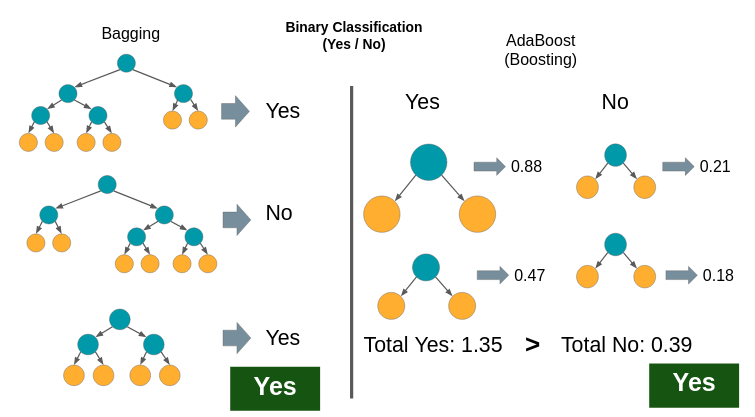

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold

In [2]:
mushrooms = pd.read_csv("mushrooms.csv")
mushrooms.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [3]:
print(mushrooms.shape)
print(mushrooms.isna().sum(axis=0))
for i in mushrooms.columns:
    print(f'{i} -> \t{mushrooms[i].unique()}')
    


(8124, 23)
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
class -> 	['p' 'e']
cap-shape -> 	['x' 'b' 's' 'f' 'k' 'c']
cap-surface -> 	['s' 'y' 'f' 'g']
cap-color -> 	['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises -> 	['t' 'f']
odor -> 	['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment -> 	['f' 'a']
gill-spacing -> 	['c' 'w']
gill-size 

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column] = labelencoder.fit_transform(mushrooms[column])
    
mushrooms

class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                   1             0          0           5  ...   
3                   1             0          1           5  ...   
4                   1             1          0           4  ...   
...               ...           ...        ...         ...  ...   
8119                0             0          0          11  ...   
8120                0             0          0          11  ...   
8121                0             0          0           5  ...   
8122                1             0          1           0  ...   
8123                0             0          0          11  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          7          0           2            1          4   
2                          7          0           2            1          4   
3                          7          0           2            1          4   
4                          7          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       5          0           1            1          4   
8120                       5          0           0            1          4   
8121                       5          0           1            1          4   
8122                       7          0           2            1          0   
8123                       5          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 23 columns]

In [5]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif

x = mushrooms
x = x.drop(columns=['class'])
y = mushrooms[['class']]

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>, <AxesSubplot:>,


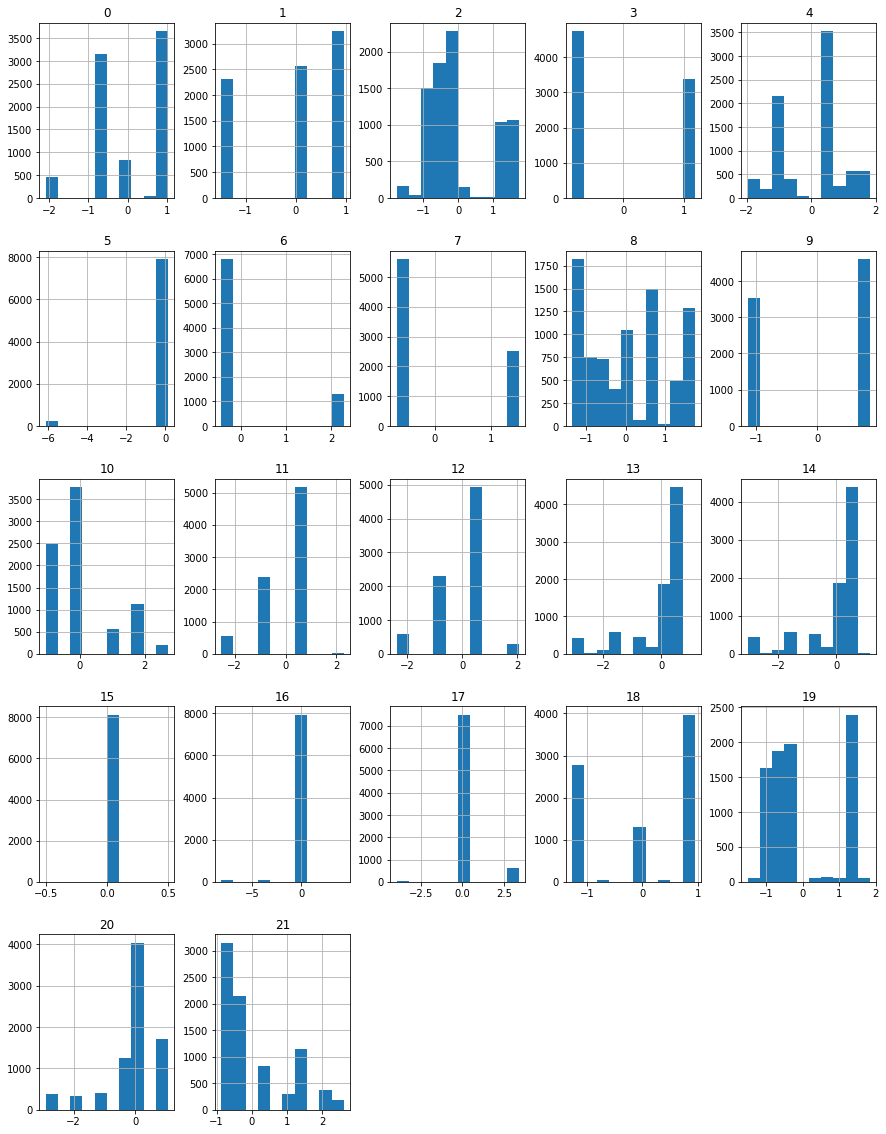

In [7]:
from sklearn.preprocessing import StandardScaler
stand_x = StandardScaler()
x = stand_x.fit_transform(x)

fig = plt.figure(figsize=(15,20))

ax = fig.gca()
pd.DataFrame(x).hist(ax=ax)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [66]:
model = AdaBoostClassifier(n_estimators=220, learning_rate=0.49)
k_fold = KFold(n_splits=10, random_state=123, shuffle=True)
model.fit(x_train, y_train)

predictions = cross_val_predict(model, x_test, y_test, cv=k_fold)

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when 

In [67]:
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[820   0]
 [  0 805]]
1.0


In [39]:
features = mushrooms.drop(columns=['class'])
feature_columns = features.columns
feature_columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [40]:
feature_columns = feature_columns.tolist()
feature_columns

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


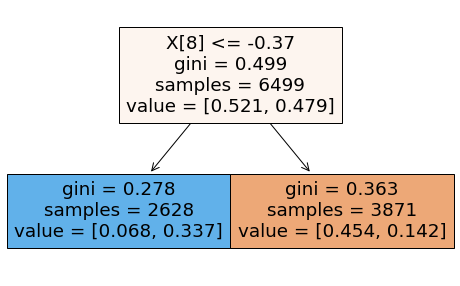

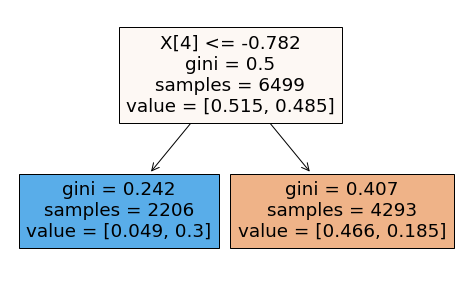

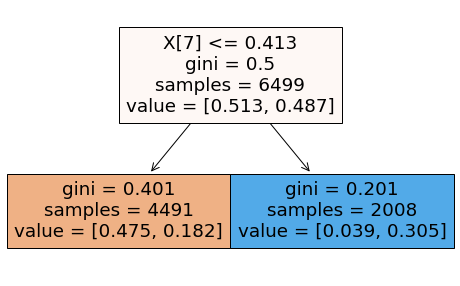

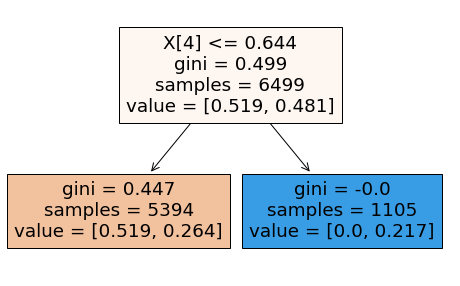

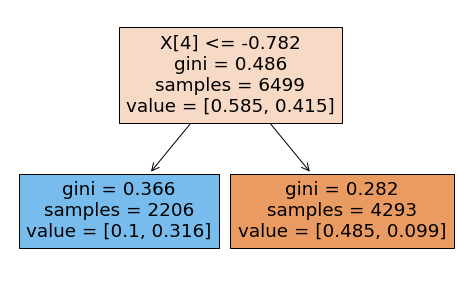

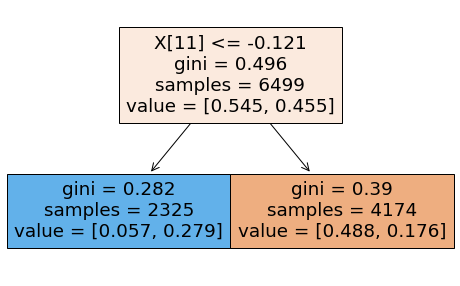

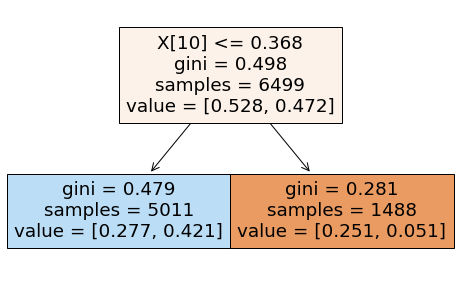

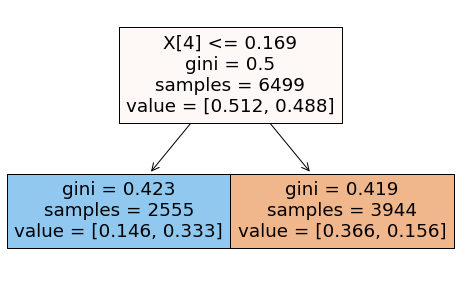

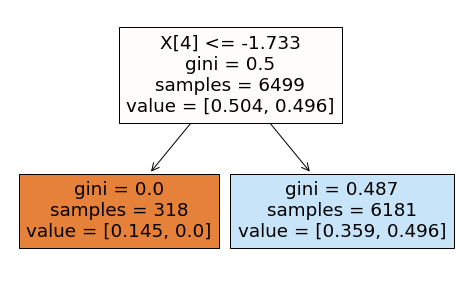

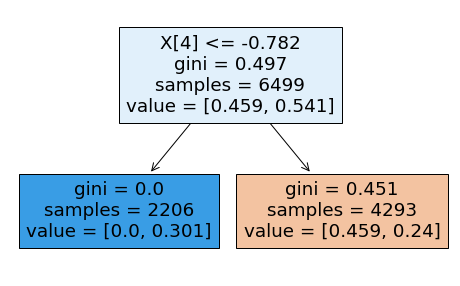

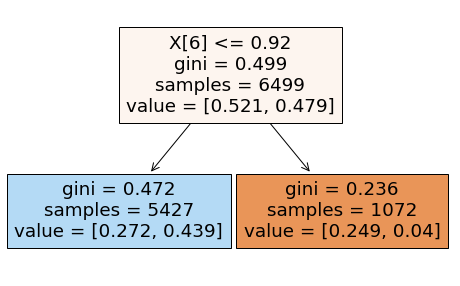

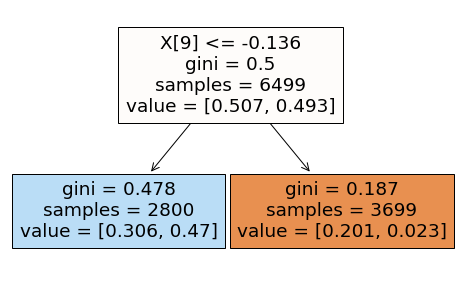

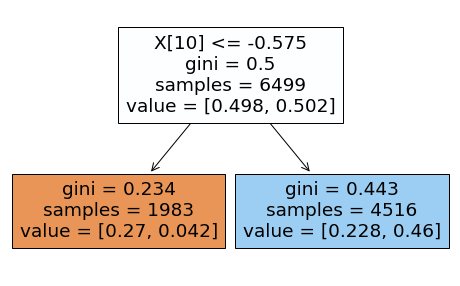

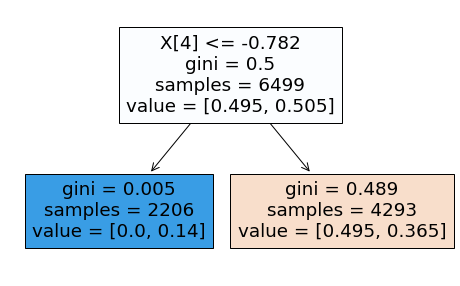

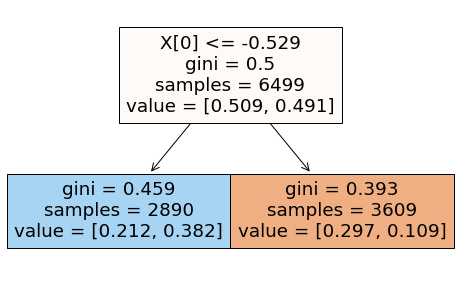

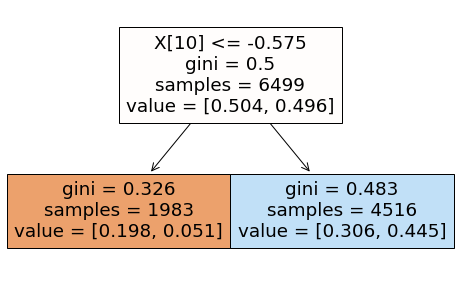

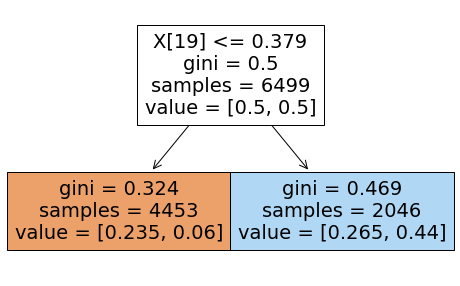

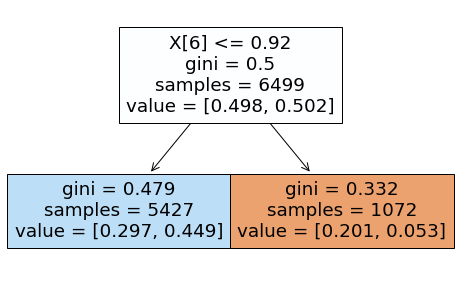

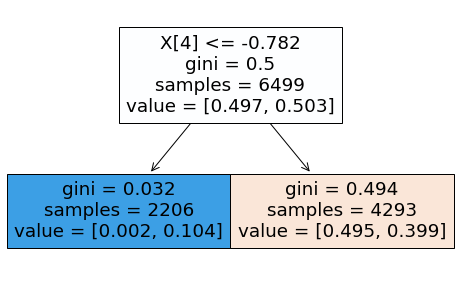

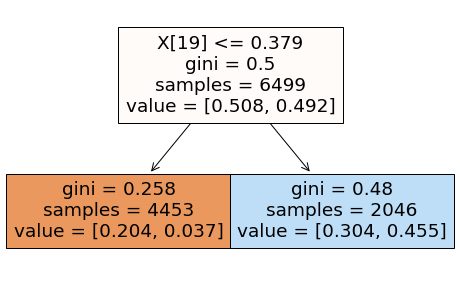

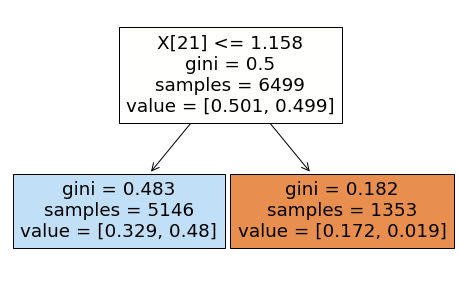

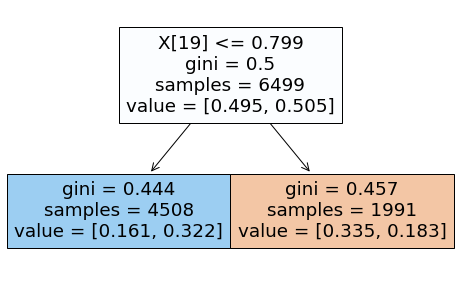

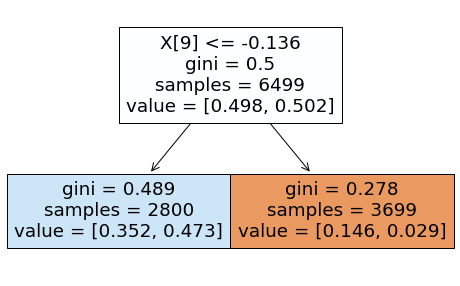

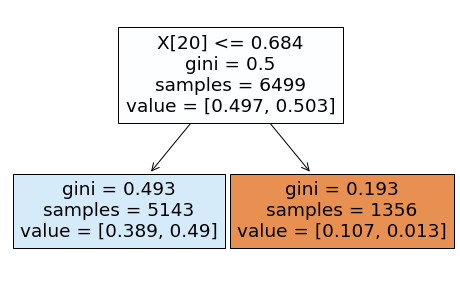

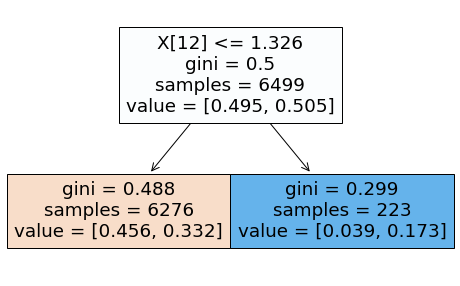

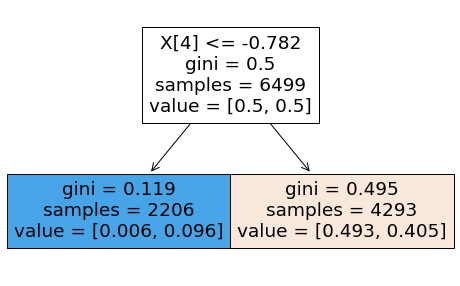

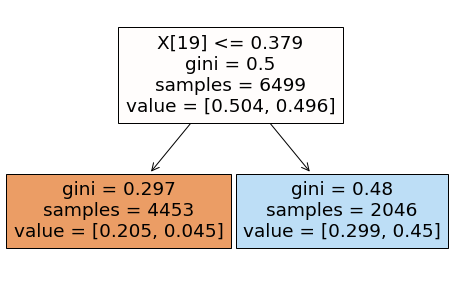

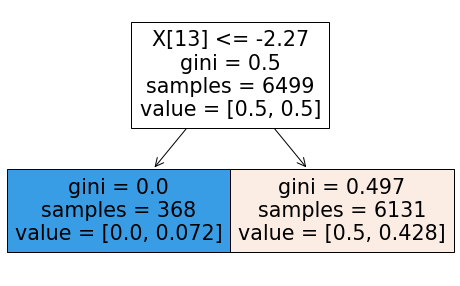

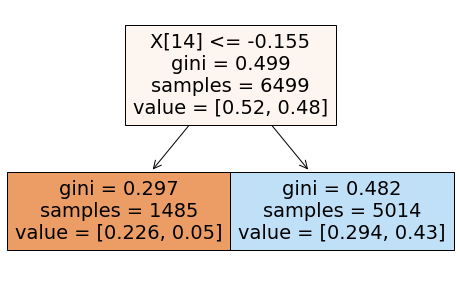

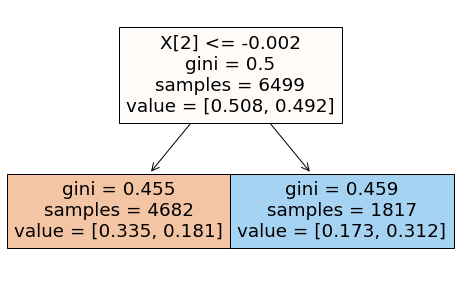

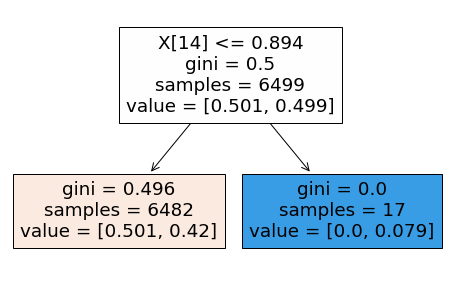

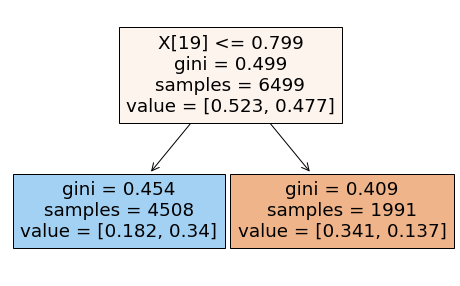

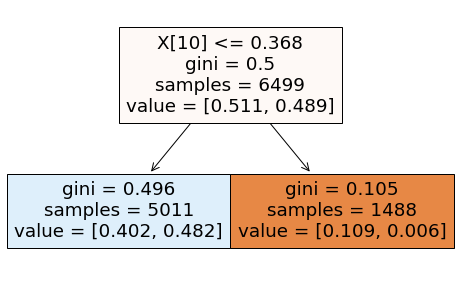

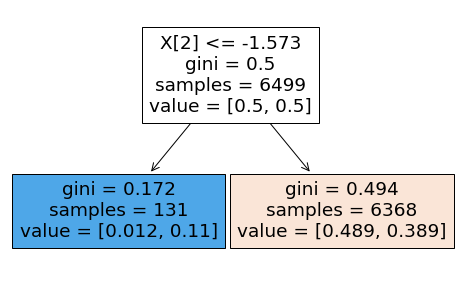

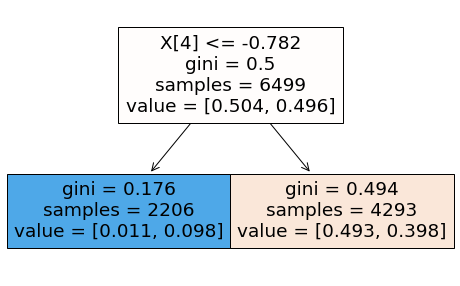

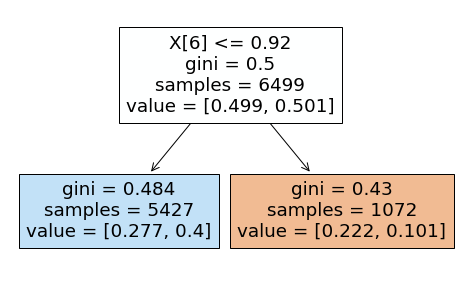

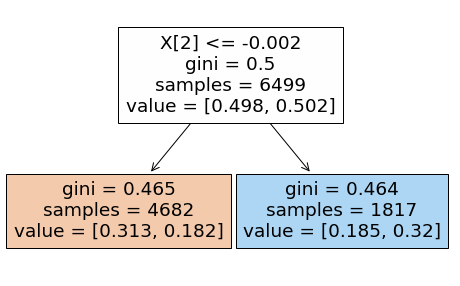

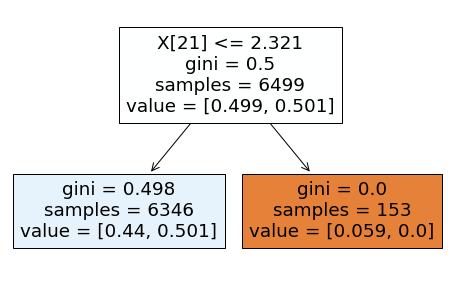

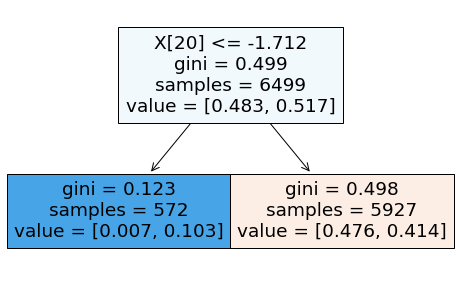

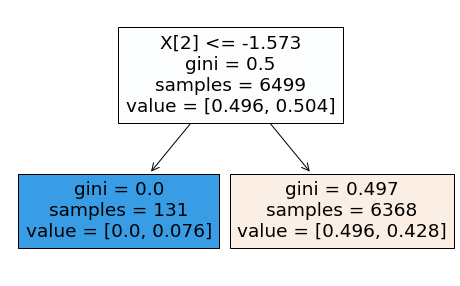

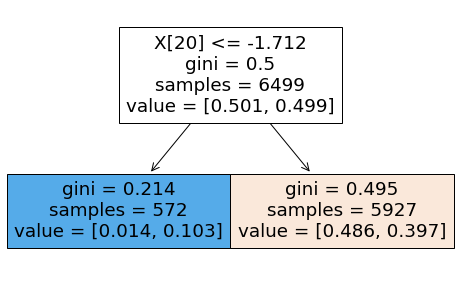

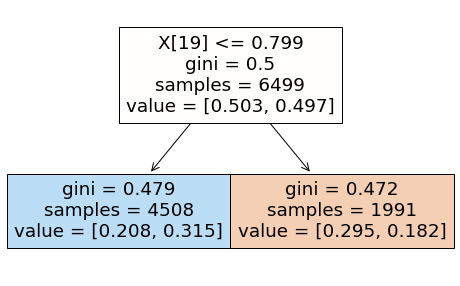

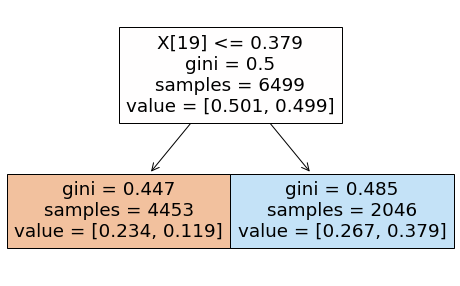

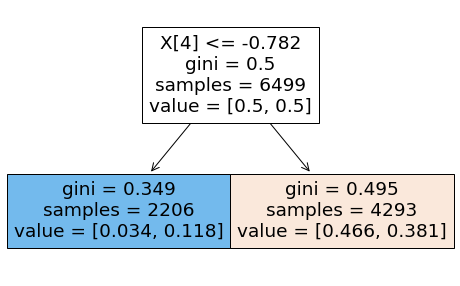

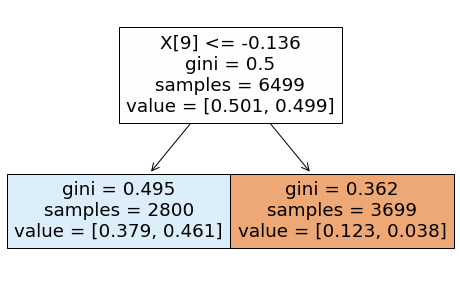

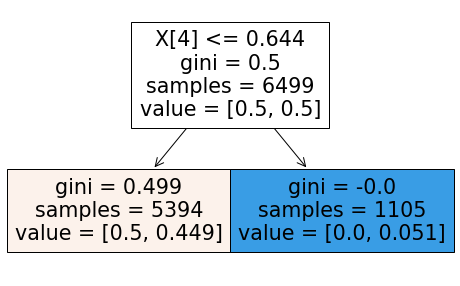

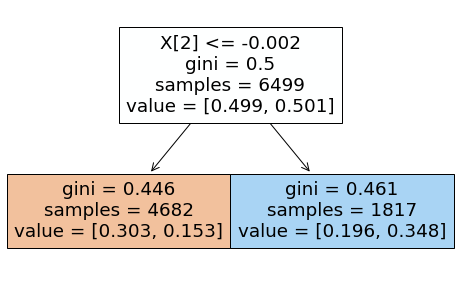

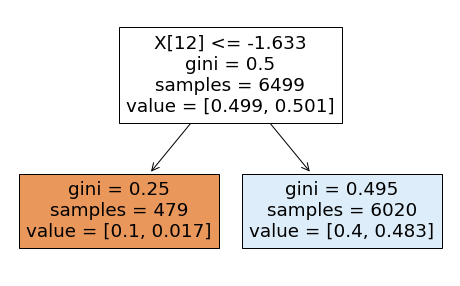

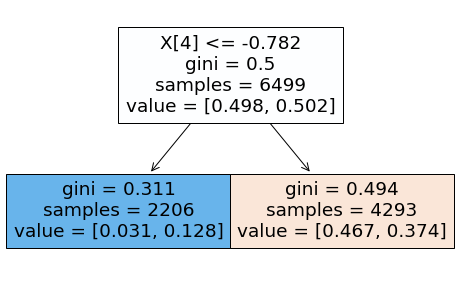

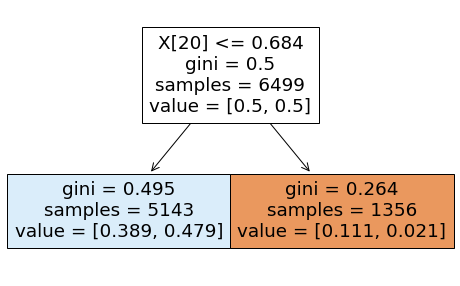

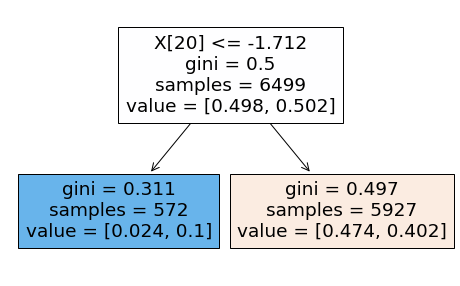

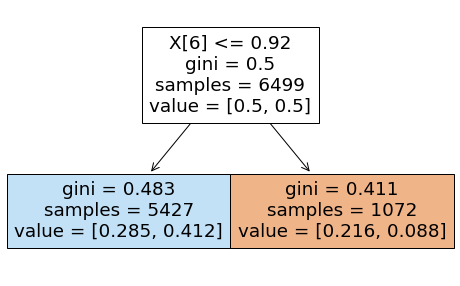

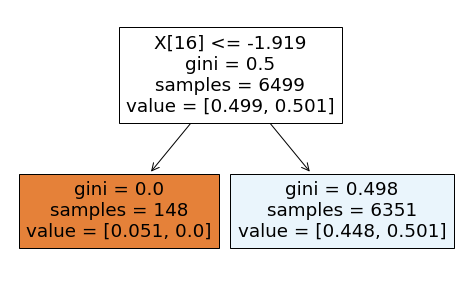

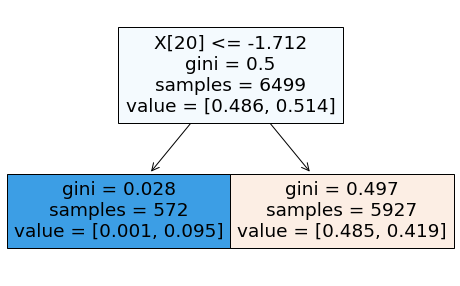

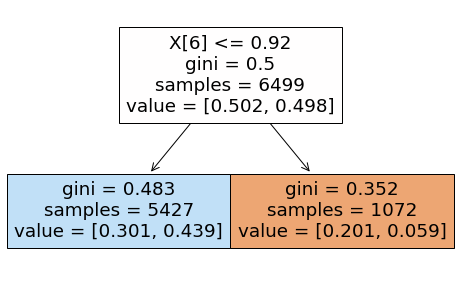

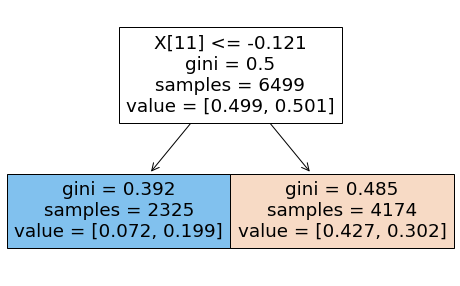

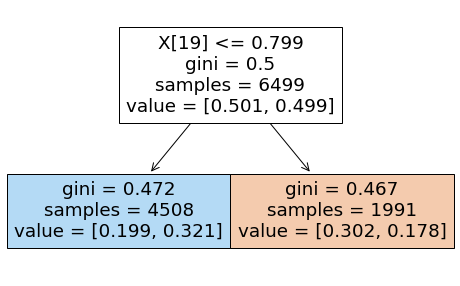

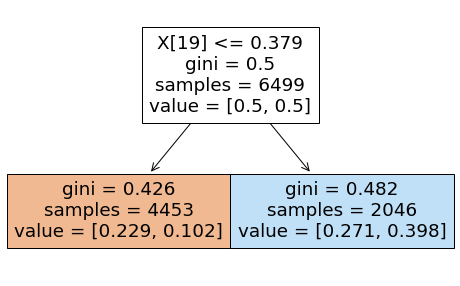

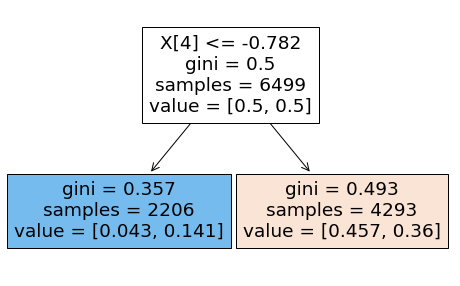

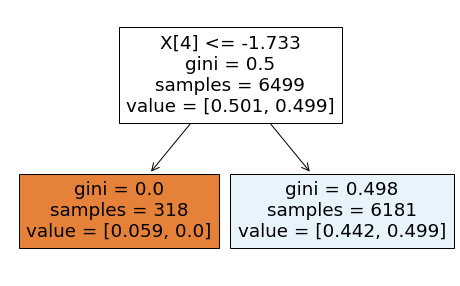

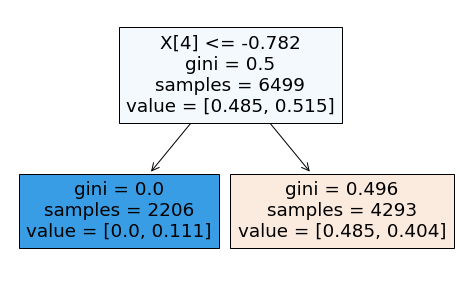

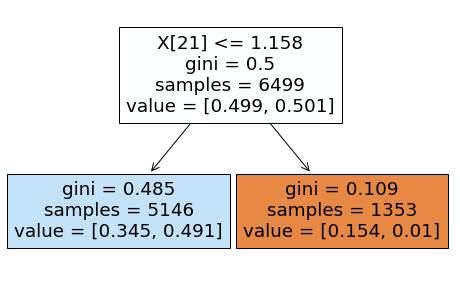

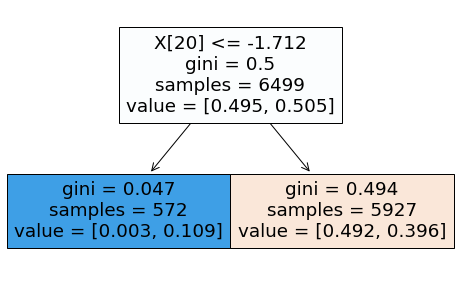

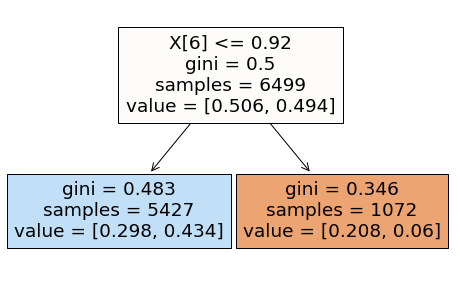

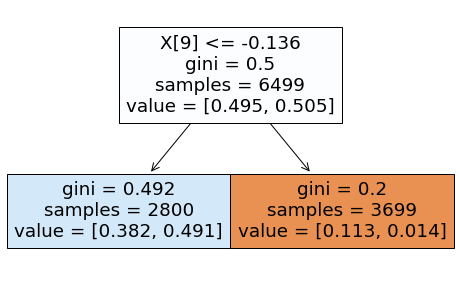

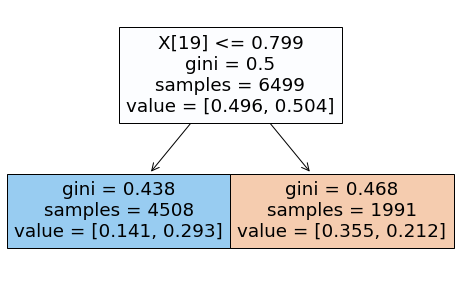

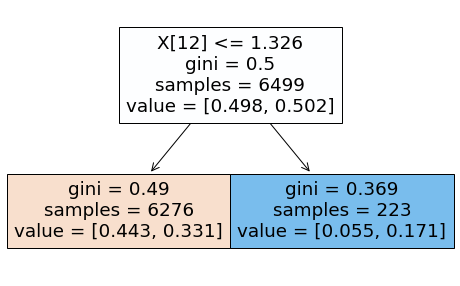

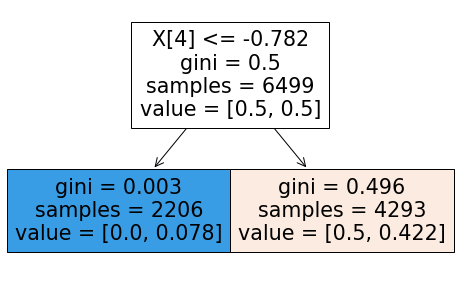

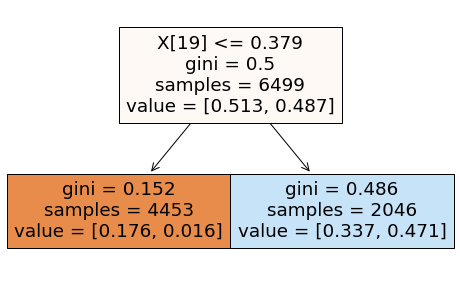

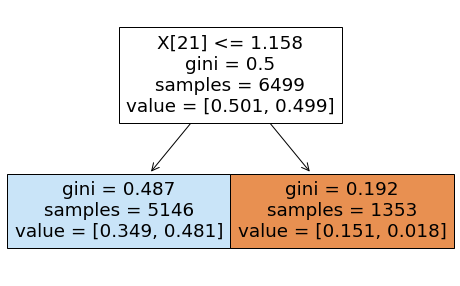

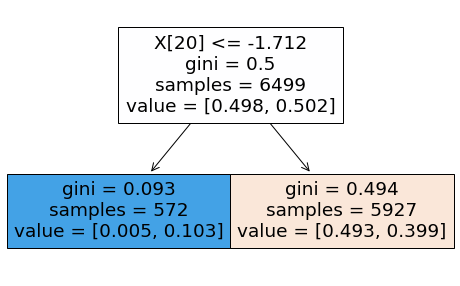

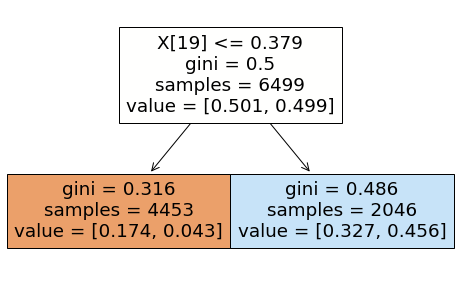

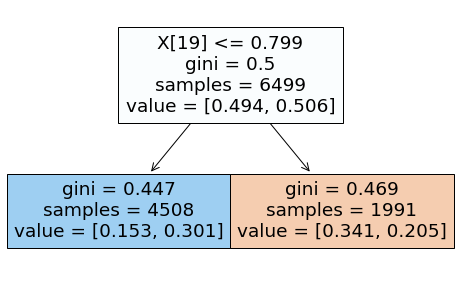

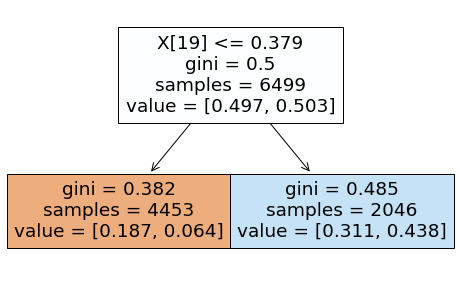

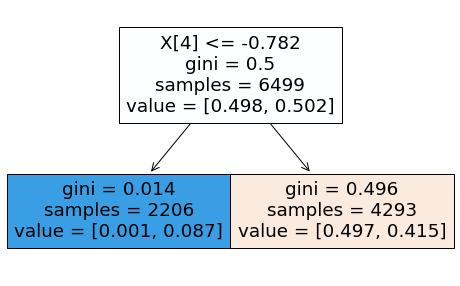

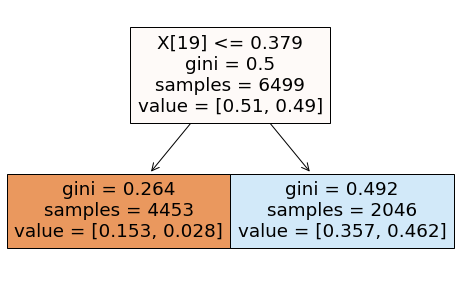

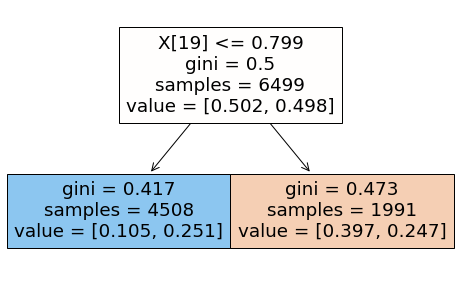

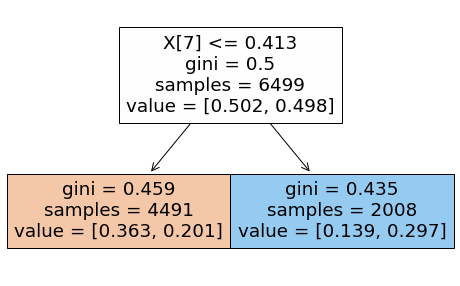

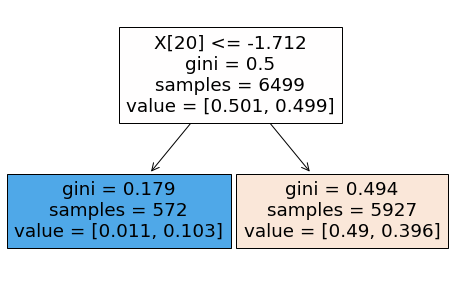

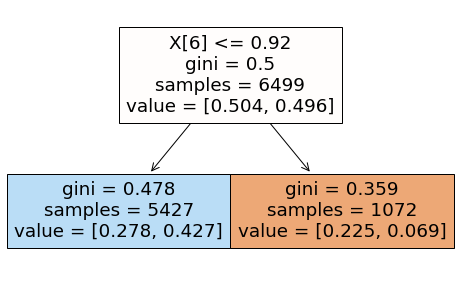

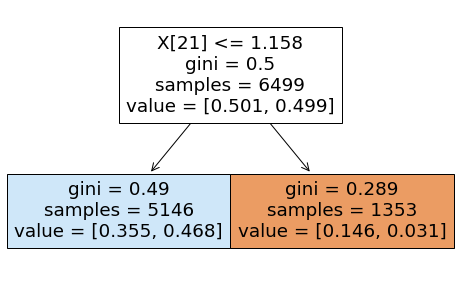

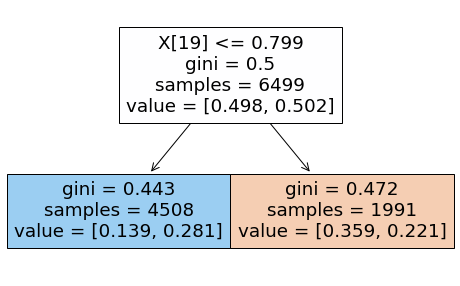

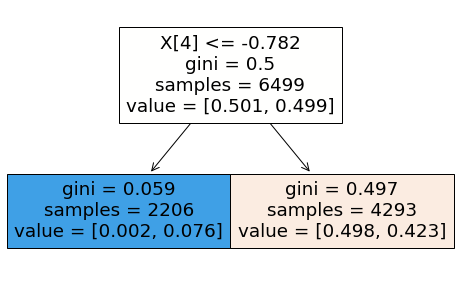

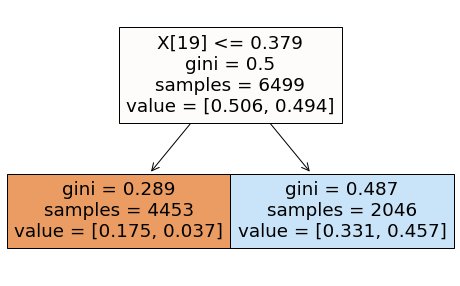

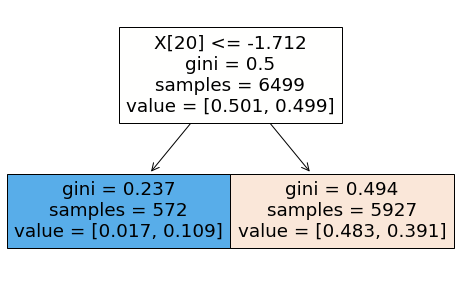

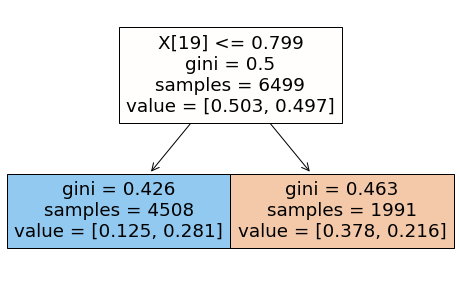

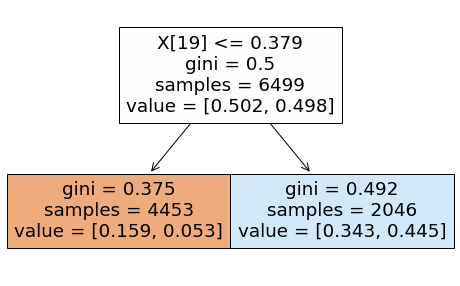

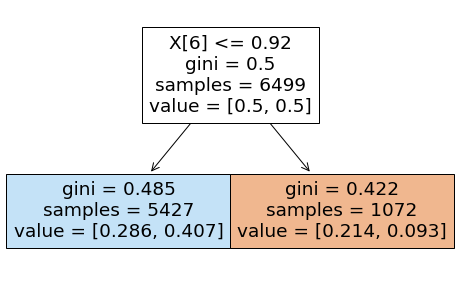

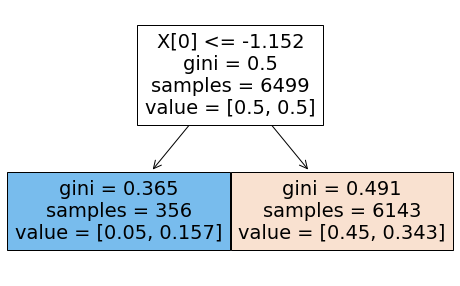

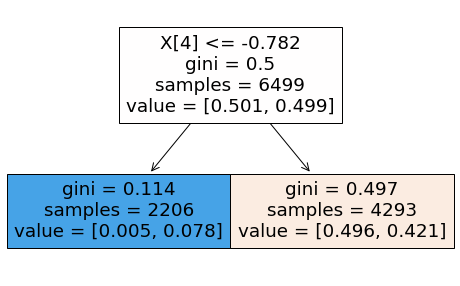

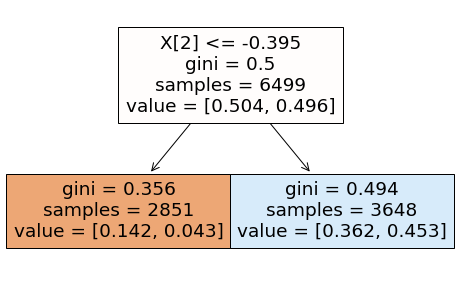

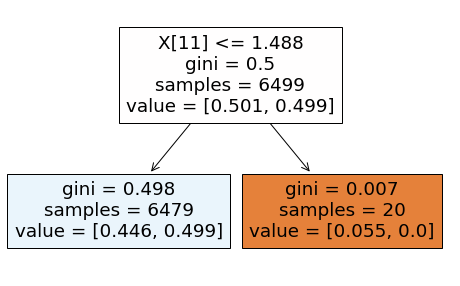

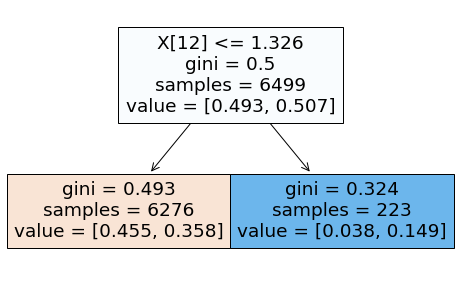

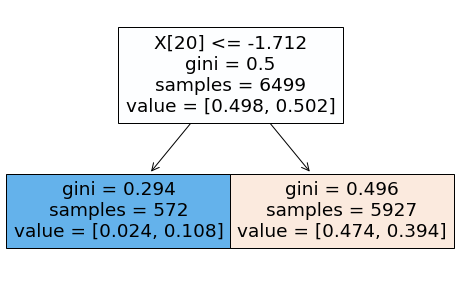

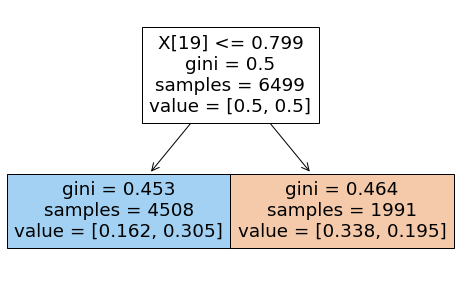

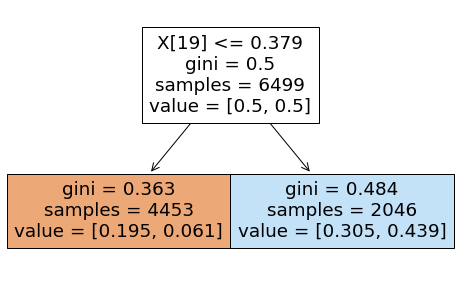

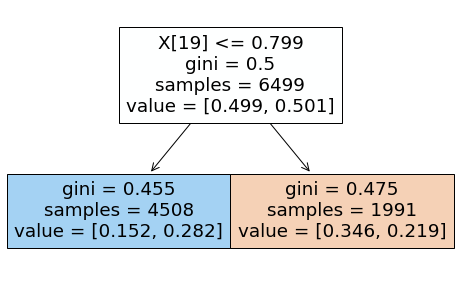

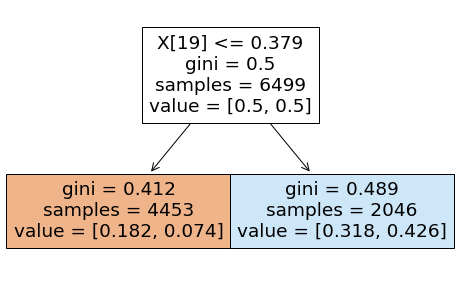

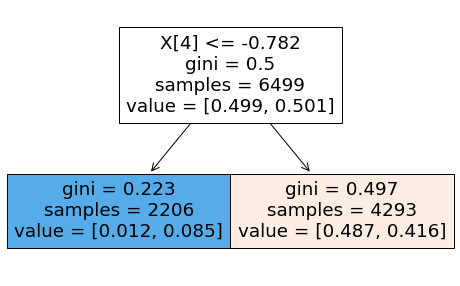

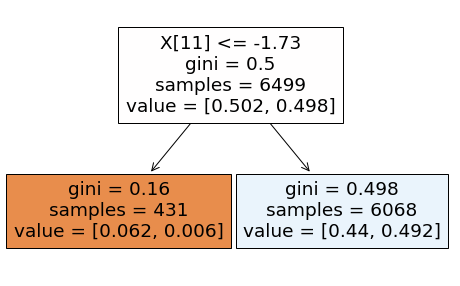

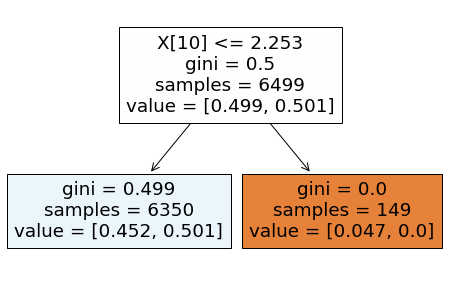

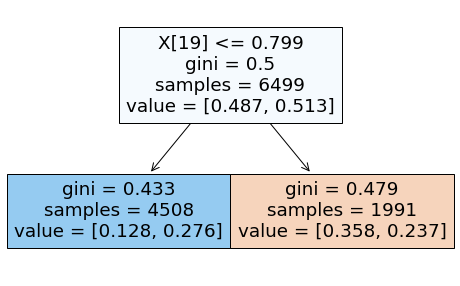

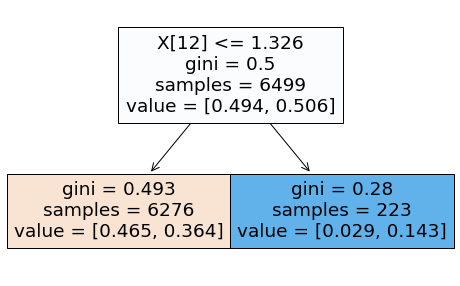

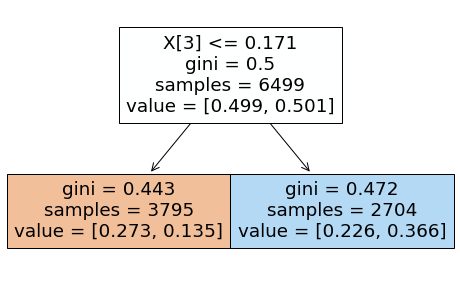

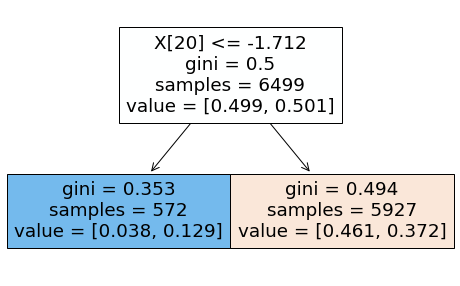

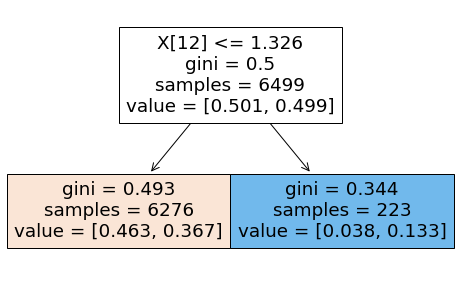

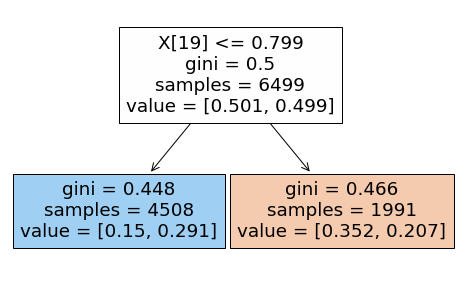

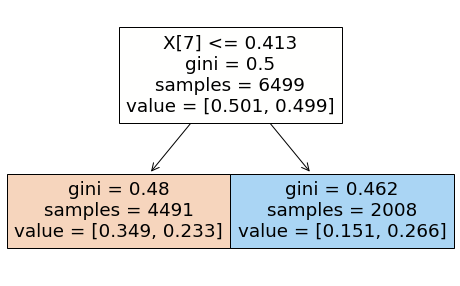

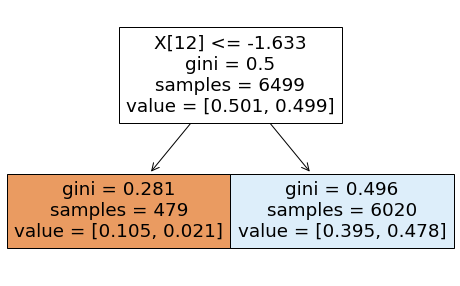

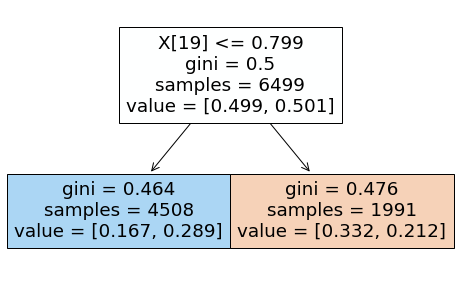

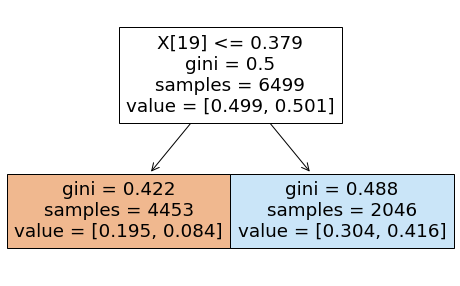

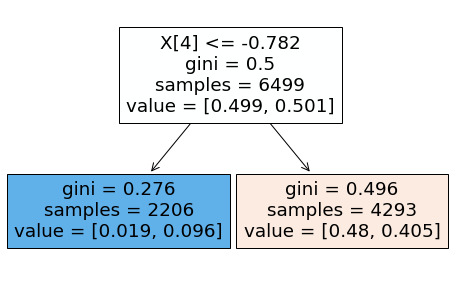

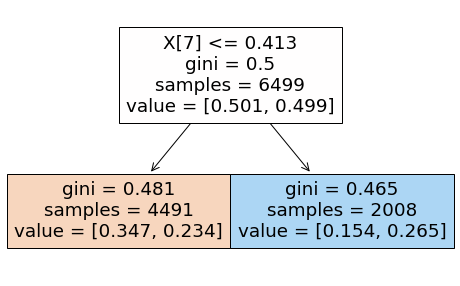

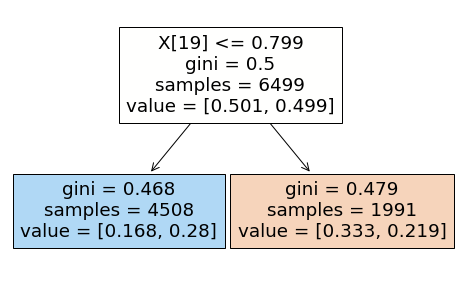

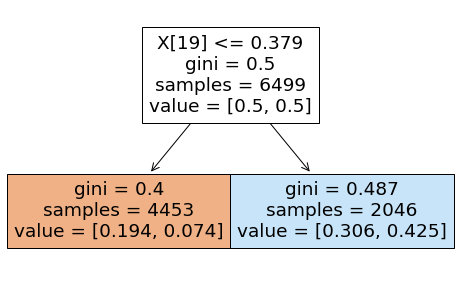

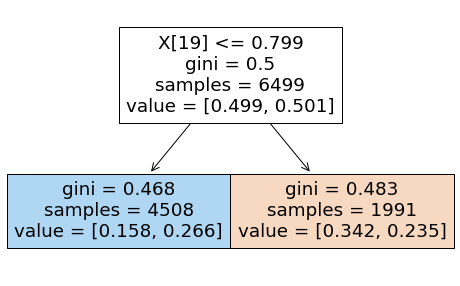

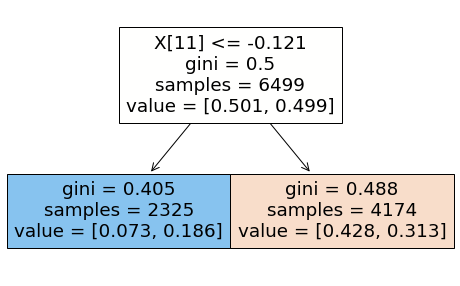

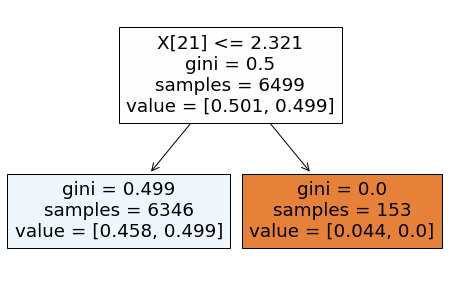

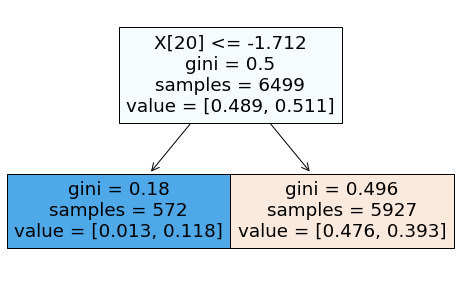

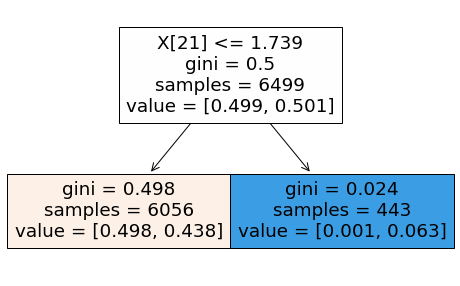

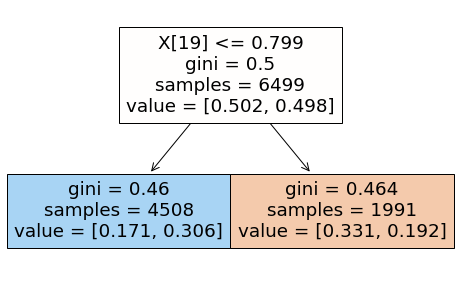

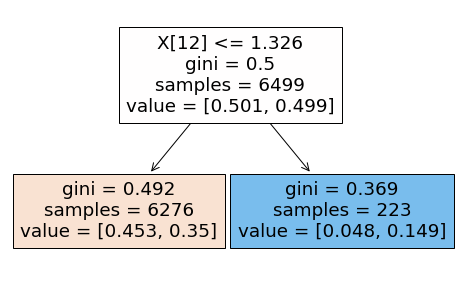

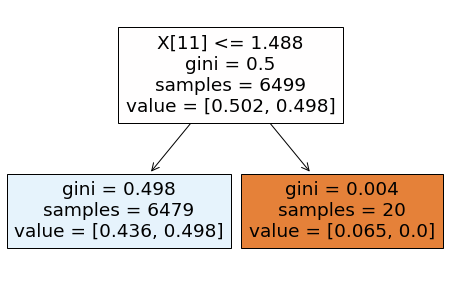

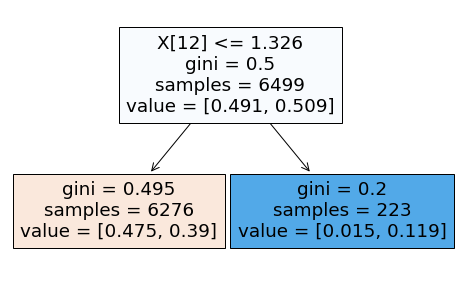

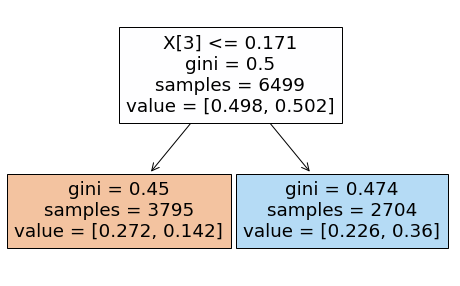

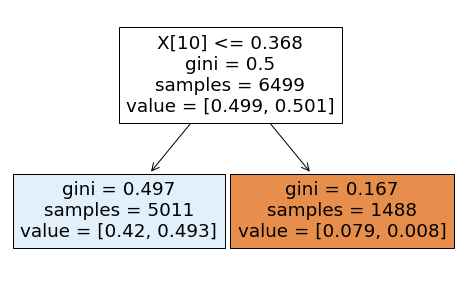

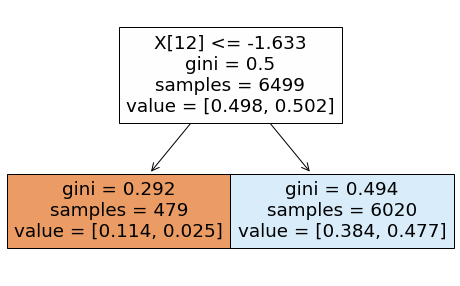

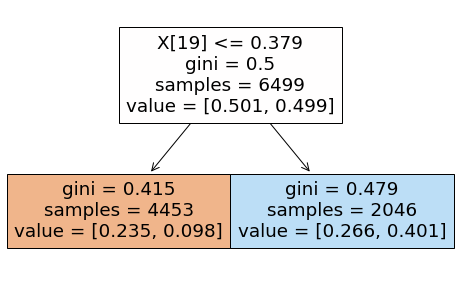

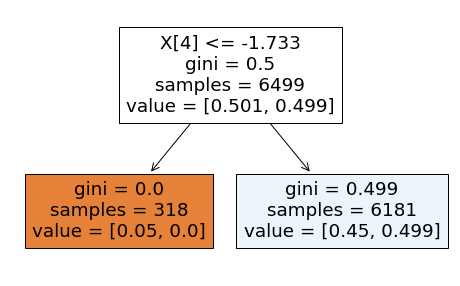

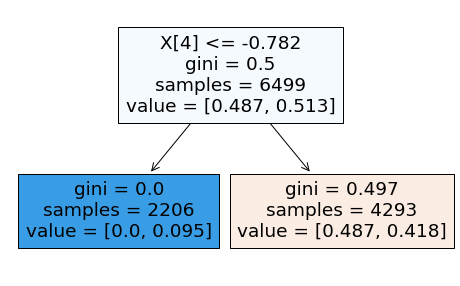

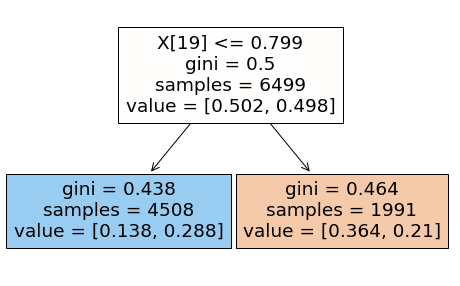

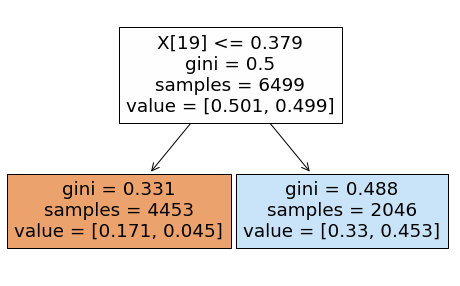

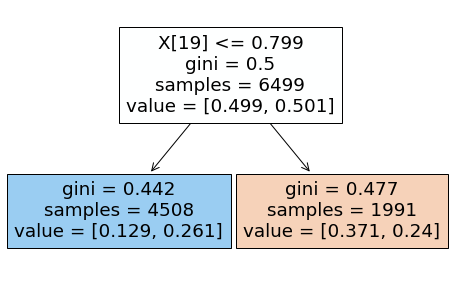

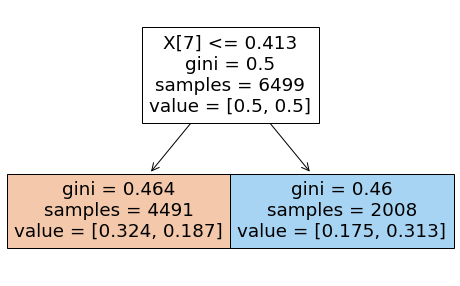

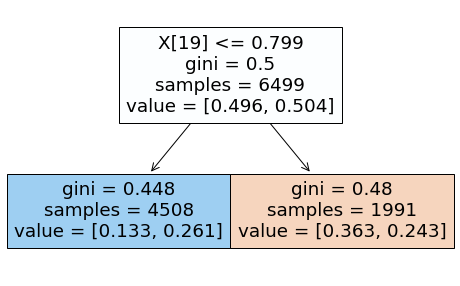

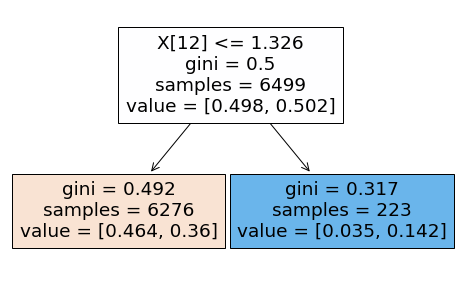

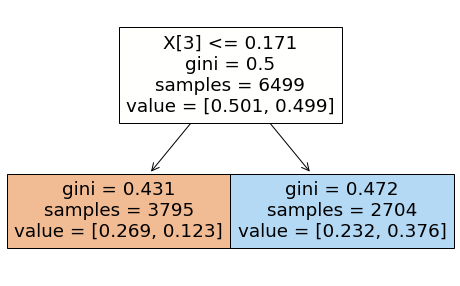

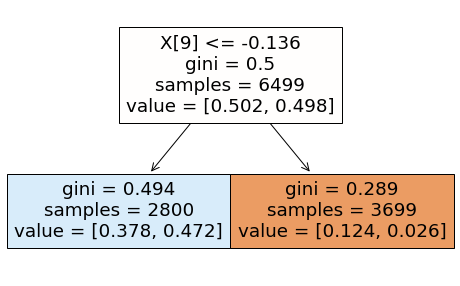

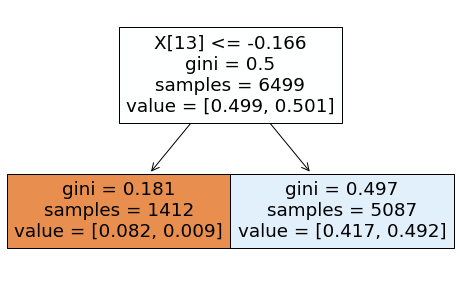

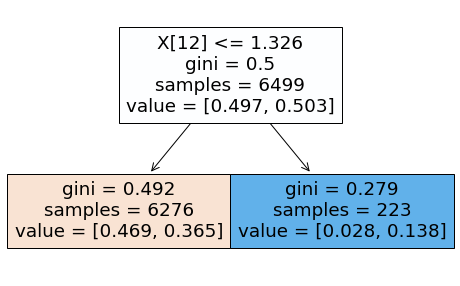

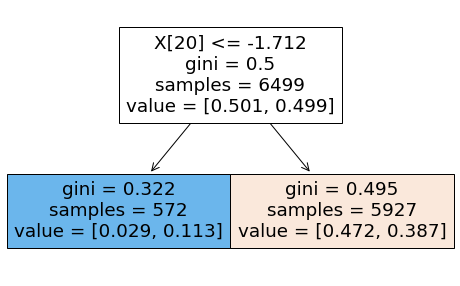

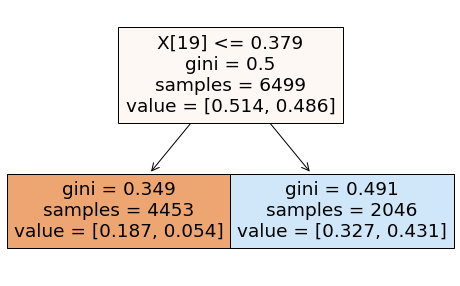

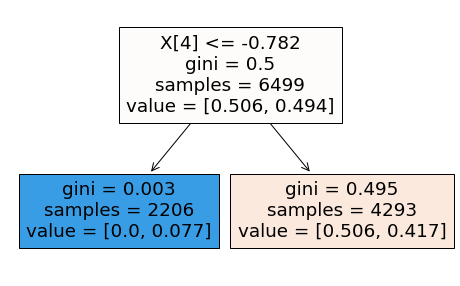

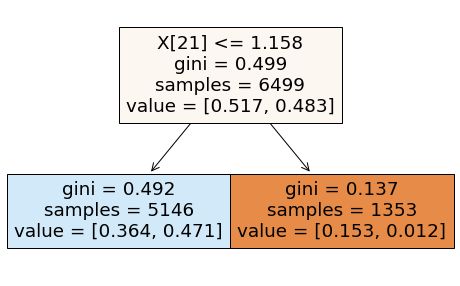

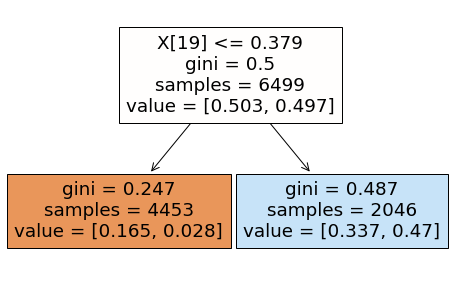

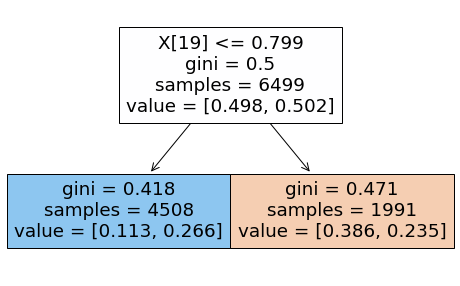

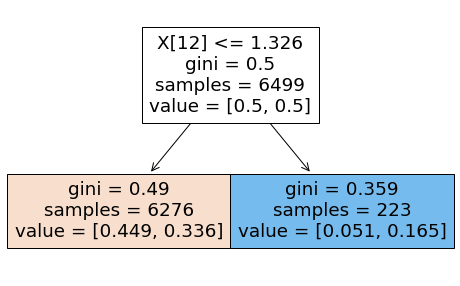

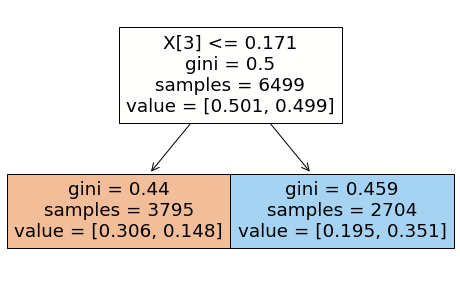

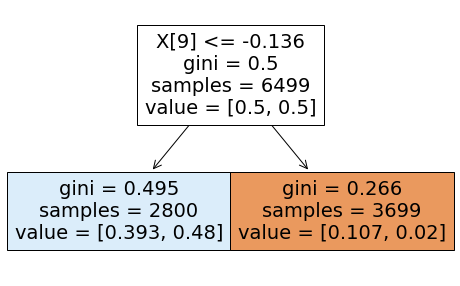

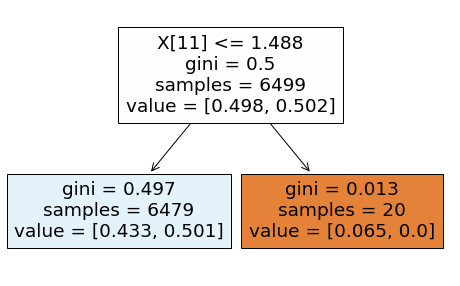

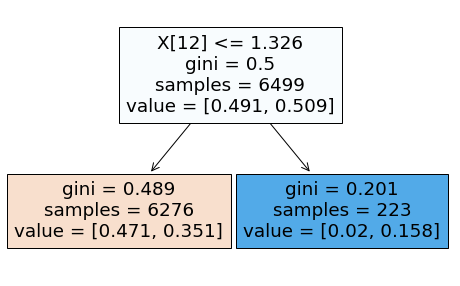

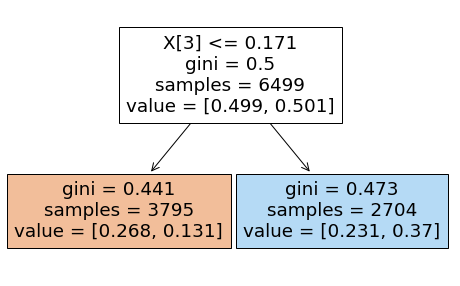

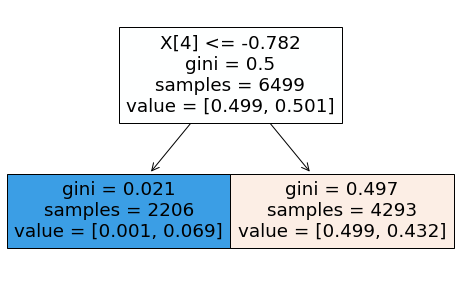

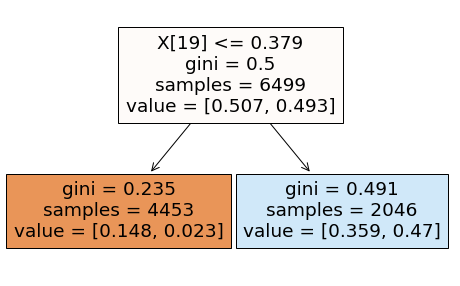

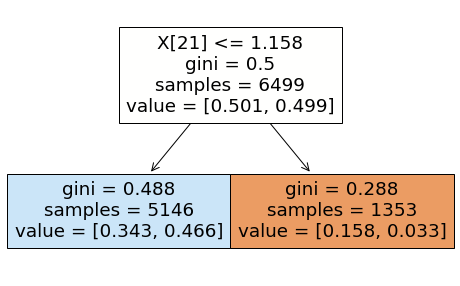

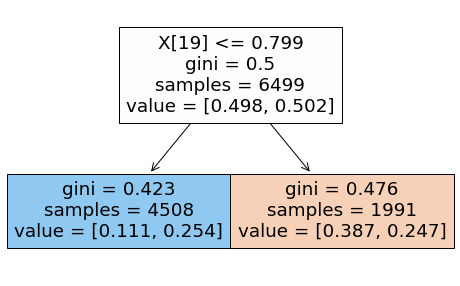

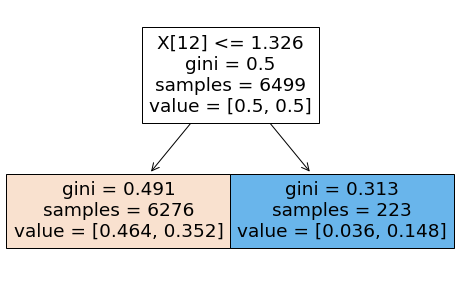

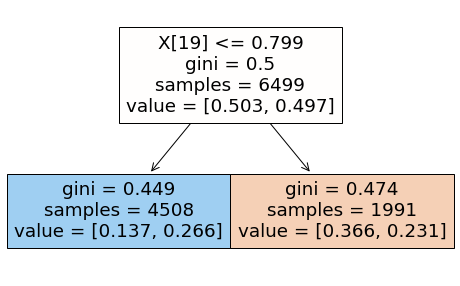

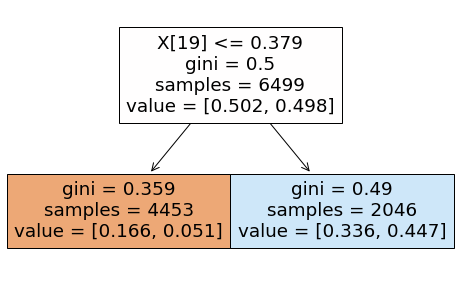

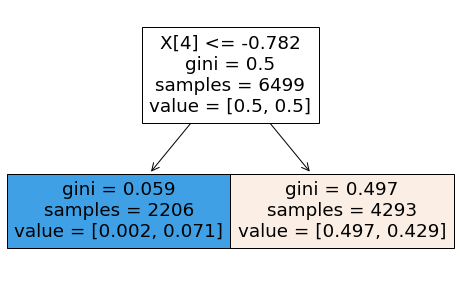

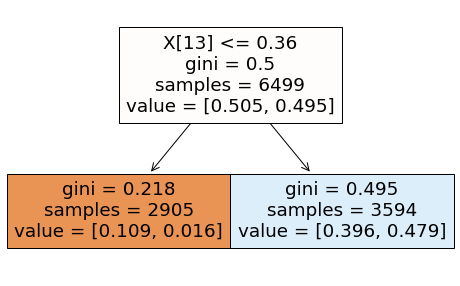

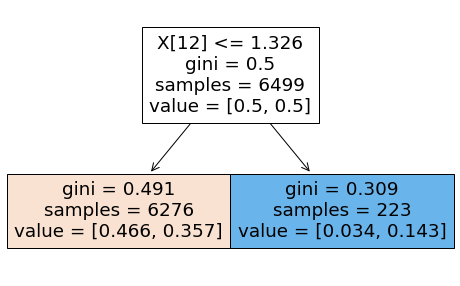

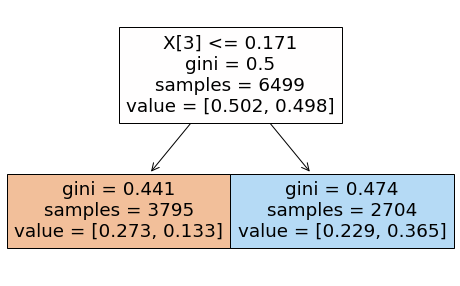

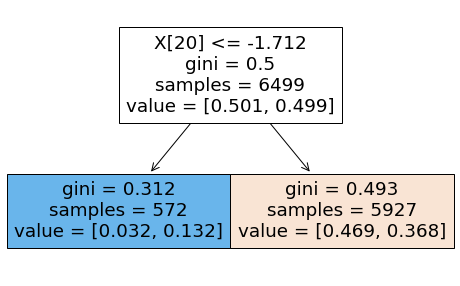

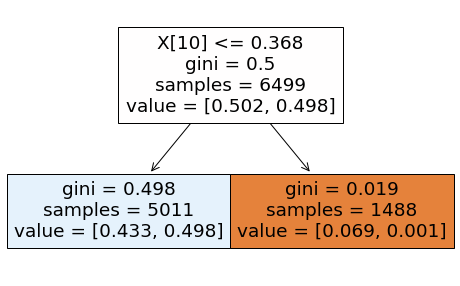

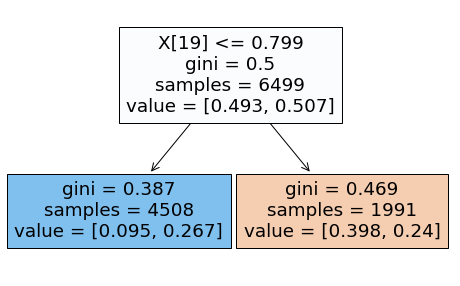

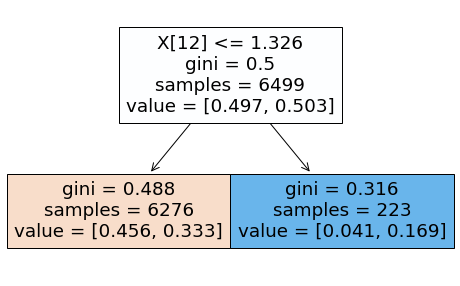

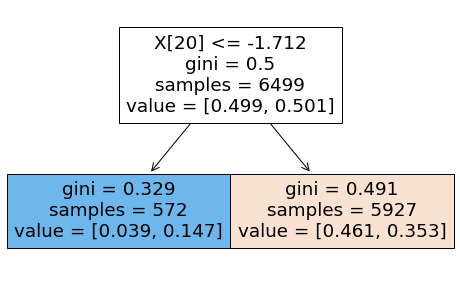

In [69]:
for i in range(0,len(model.estimators_)):
    plt.figure(figsize=(8,5))
    tree.plot_tree(model.estimators_[i], filled=True)

In [70]:
len(model.estimators_)

220